# ( bikeshareDataset Exploration )
##  by sally hamed

## Preliminary Wrangling

> The 2019 Ford Go-Bike Dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



In [1]:
# import all packages and set plots to be embedded inline.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loan in dataset into a pandas dataframe, print statistics.
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# high-level overview of data shape and composition.
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# descriptive statistics for numeric variables.
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
# Missing values in dataset.
gobike.isnull().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#Remove missing values.
gobike.dropna( inplace = True)

In [7]:
# checking the null values after the dropping.
gobike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [8]:
# check if there is a dplicates in data. 
gobike.duplicated().sum()
#There is no duplicate values in the dataset

0

In [9]:
#New data shape 
gobike.shape

(174952, 16)

In [10]:
#Calculate the distance between stations
gobike['distance'] = np.sqrt((gobike['end_station_longitude']- gobike['start_station_longitude']) ** 2
                            +(gobike['end_station_latitude'] - gobike['start_station_latitude']) ** 2)

In [11]:
#Calculate the ages for users
gobike['age'] = 2019 - gobike['member_birth_year']


In [12]:
gobike['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [13]:
no_age_info = (gobike['age']>100)
# remove points with inconsistent depth values.
gobike= gobike.loc[- no_age_info ,:]

In [14]:
gobike['age'].unique()

array([35., 47., 30., 45., 60., 36., 31., 27., 23., 26., 29., 38., 44.,
       41., 28., 22., 33., 19., 37., 24., 39., 46., 34., 48., 40., 52.,
       21., 25., 42., 20., 32., 50., 56., 43., 55., 54., 58., 51., 53.,
       57., 65., 61., 59., 49., 63., 62., 74., 67., 71., 68., 78., 69.,
       70., 66., 64., 73., 72., 88., 76., 77., 99., 86., 18., 75., 91.,
       85., 80., 89., 81., 92.])

In [15]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0,10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # Fill in this list with  values you found

In [16]:

# Labels for the agelevel groups
bin_names = ["child","teen","young_adult","30s","40s", "50s", "retirement", "70s", "80s", "90s" ] # Name each age level categor

In [17]:
# Creates age_levels column
gobike['age_levels']=pd.cut(gobike['age'],bin_edges, labels=bin_names)

# Checks for successful creation of this column
gobike.head(10)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,age,age_levels
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.005067,35.0,30s
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,0.027784,47.0,40s
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.002721,30.0,young_adult
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,0.025835,45.0,40s
5,1793,49:58.6,19:51.8,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,0.031301,60.0,50s
6,1147,55:35.1,14:42.6,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,0.020890,36.0,30s
7,1615,41:06.8,08:02.8,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,0.041961,30.0,young_adult
8,1570,41:48.8,07:59.7,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,0.041961,31.0,30s
9,1049,49:47.7,07:17.0,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,0.034726,27.0,young_adult
10,458,57:57.2,05:35.4,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes,0.008960,23.0,young_adult


In [18]:
#New data shape 
gobike.shape

(174880, 19)

### What is the structure of your dataset?

> There are 174880 bike trip in the dataset with 20 features .The dataset was  enhanced with features that I  find necessary to perform  analysis:
- age of customer 
- distance of biking trip


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the duration of the biking in the datase
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  I expect that biking distance will have the strongest effect on each biking duration : the larger the distance, the higher the duration. I also think that the : age, gender, bike share for all trip, user type,and start :end station, will have effects on the duration, though to a  smaller degree than the main effect of distance.

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: trip duration

In [19]:
#Change the duration_sec to duration_min
gobike['duration_min'] = gobike['duration_sec'] / 60

In [20]:
#Rough value distribution of duration_min
gobike['duration_min'].describe()

count    174880.000000
mean         11.733706
std          27.375248
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [21]:
#check duration_min  distribution
gobike['duration_min'].value_counts()

4.533333      308
5.383333      285
5.083333      282
6.150000      280
4.566667      276
             ... 
139.916667      1
127.150000      1
168.466667      1
139.083333      1
75.216667       1
Name: duration_min, Length: 4429, dtype: int64

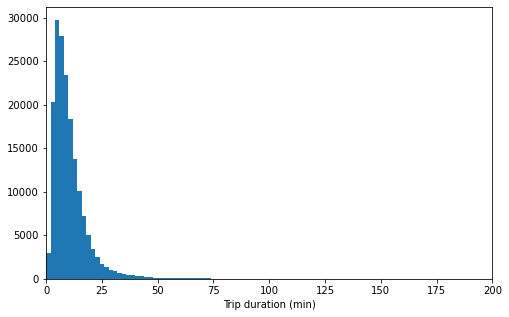

In [22]:
# duration_min  histogram plot
bins = np.arange(0,gobike['duration_min'].max()+2, 2)
plt.figure(figsize = [8,5])
plt.hist(data = gobike, x = 'duration_min', bins = bins)
plt.xlabel('Trip duration (min)')
plt.xlim([0,200]);


In [23]:
# Transform the describe() to a scale of log10
np.log10(gobike['duration_min'].describe())

count    5.242740
mean     1.069435
std      1.437358
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: duration_min, dtype: float64

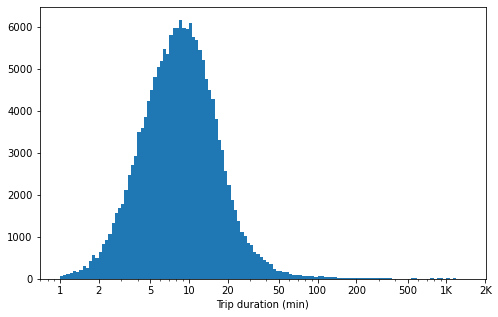

In [24]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(gobike['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = gobike, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1e3, 2e3], [1, 2, 5, 10, 20, 50, 100, 200, 500, '1K', '2K'])
plt.xlabel('Trip duration (min)')
plt.show();

> Trip duration has a long-tailed distribution. When plotted on a log-scale, the trip duration distribution looks normal, with one peak between 4 and 5 minutes. Looks like  at least 75% of the trip durations are less than 15 minutes. On average, a user did a ride in no more than 11.15 minutes


Next up, the first predictor variable of interest: distance

In [25]:
# descriptive statistics for distance.
gobike['distance'].describe()

count    174880.000000
mean          0.016935
std           0.010916
min           0.000000
25%           0.009139
50%           0.014211
75%           0.022246
max           0.699399
Name: distance, dtype: float64

In [26]:
#check distance  distribution
gobike['distance'].value_counts()

0.000000    3458
0.011788     591
0.019539     493
0.012684     491
0.013810     474
            ... 
0.039723       1
0.034374       1
0.064770       1
0.032612       1
0.048353       1
Name: distance, Length: 13760, dtype: int64

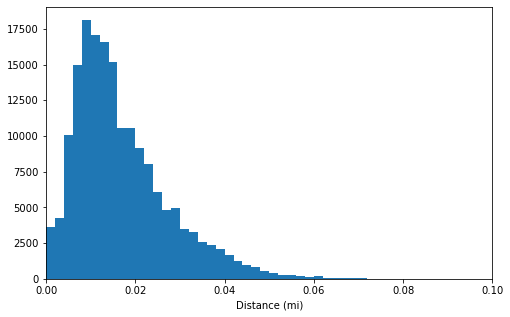

In [27]:
# plotting distance on a standard scale
bins = np.arange(0,gobike['distance'].max()+0.002, 0.002)
plt.figure(figsize = [8,5])
plt.hist(data = gobike, x = 'distance', bins = bins)
plt.xlabel('Distance (mi)')
plt.xlim([0,.1]);

>Data show a right skweed distribution and the peak is around 0.016 mi,also data show the max distance is 0.70 mi ~1.25km.It means people  using the bikes when the trip is less than 1.25 Km.


I'll now move on to the other  variables in the dataset: gender, user, and bikeshare.

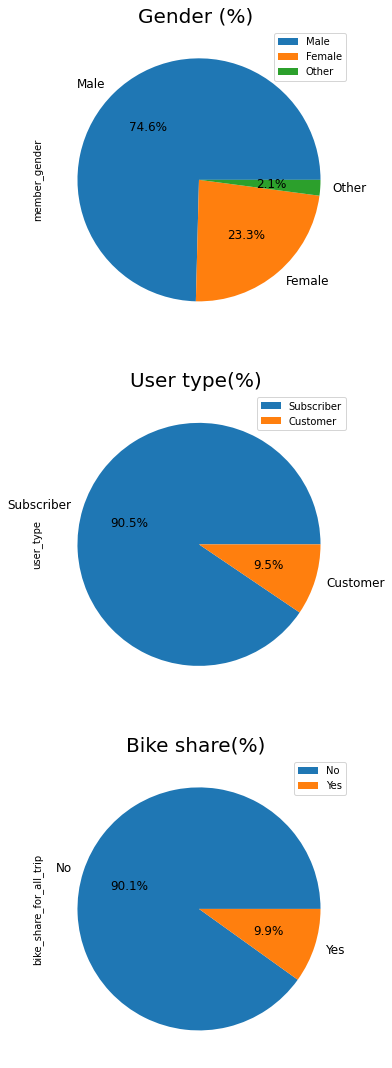

In [28]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
plt.figure(figsize = [10, 19])

plt.subplot(3, 1, 1)
all_gender = gobike['member_gender'].value_counts()
all_gender.plot(kind='pie', autopct='%1.1f%%', fontsize = 12);
plt.title('Gender (%) ', fontsize = 20)
plt.legend()

ax = plt.subplot(3, 1, 2)

all_user = gobike['user_type'].value_counts()
all_user.plot(kind='pie', autopct='%1.1f%%', fontsize = 12);
plt.title('User type(%) ', fontsize = 20);
plt.legend()

ax = plt.subplot(3, 1, 3)

share= gobike['bike_share_for_all_trip'].value_counts()
share.plot(kind='pie', autopct='%1.1f%%', fontsize = 12);
plt.title('Bike share(%) ', fontsize = 20)
plt.legend()

plt.show();

>The number of male larger than the number of female and the other.

>The bike share was  used in a little trips. This show that the program is mostly used in cities.

>The number of subscriber largely exceeds that of customer. This indicates good relationship and satisfactions from the users with the services provided. 


I'll now look at the other features in the data to see if any of them hold interesting properties.

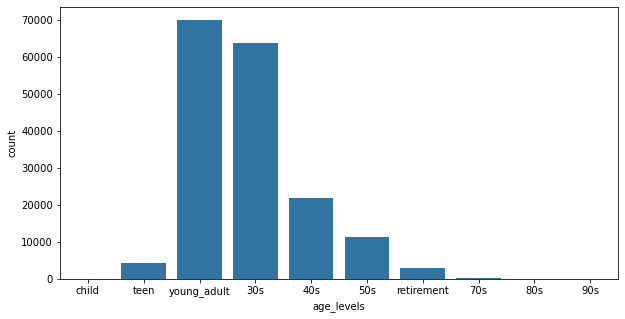

In [29]:
# see which age is the most using bike
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
sb.countplot(data=gobike, x='age_levels',color=base_color);


>the major age range of using bike are 25:40 

Next:top start and end stations 

In [30]:
top_s=gobike['start_station_name'].value_counts()[:5].index

gobike_top_s=gobike.loc[gobike['start_station_name'].isin(top_s)]

In [31]:
top_e=gobike['end_station_name'].value_counts()[:5].index

gobike_top_e=gobike.loc[gobike['end_station_name'].isin(top_e)]


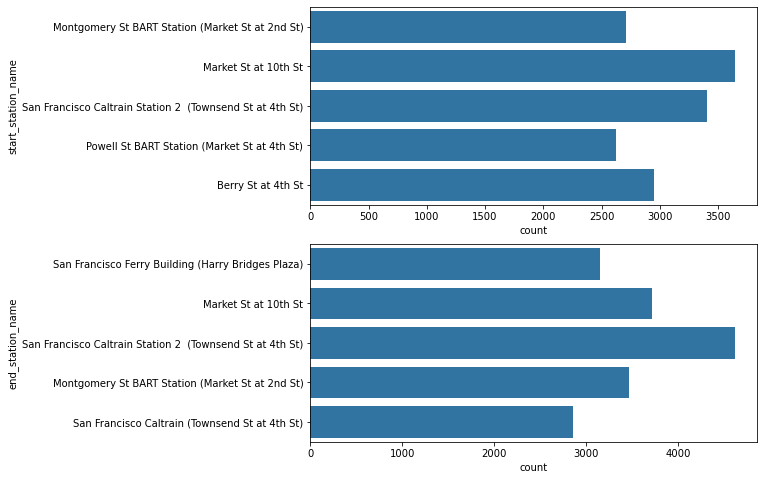

In [32]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = gobike_top_s, y = 'start_station_name', color = default_color, ax = ax[0])
sb.countplot(data = gobike_top_e, y = 'end_station_name', color = default_color, ax = ax[1])


plt.show()

>Most bike usages were coming from San Fransico,Montogmry,and powell.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration variable has long tail in the distribution, so I looked at the data using a log transform. Under the transformation, the data looked normal, with one peak between 4 and 5 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I created the age column from  member brithday.When investigating the age column, a number of outlier points were identified.there are ages more than 100 ,all of these points were removed from the dataset to move forwards. I also created a distance length measure as it was lacking.

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features in the data.

In [33]:
numeric_vars = ['duration_min', 'distance', 'age']
categoric_vars = ['member_gender', 'user_type', 'bike_share_for_all_trip']

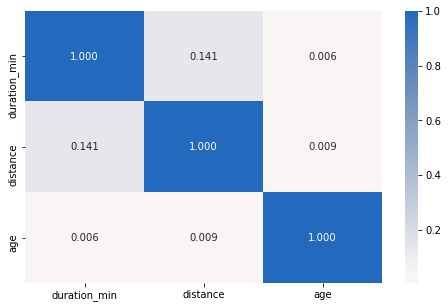

In [34]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(gobike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

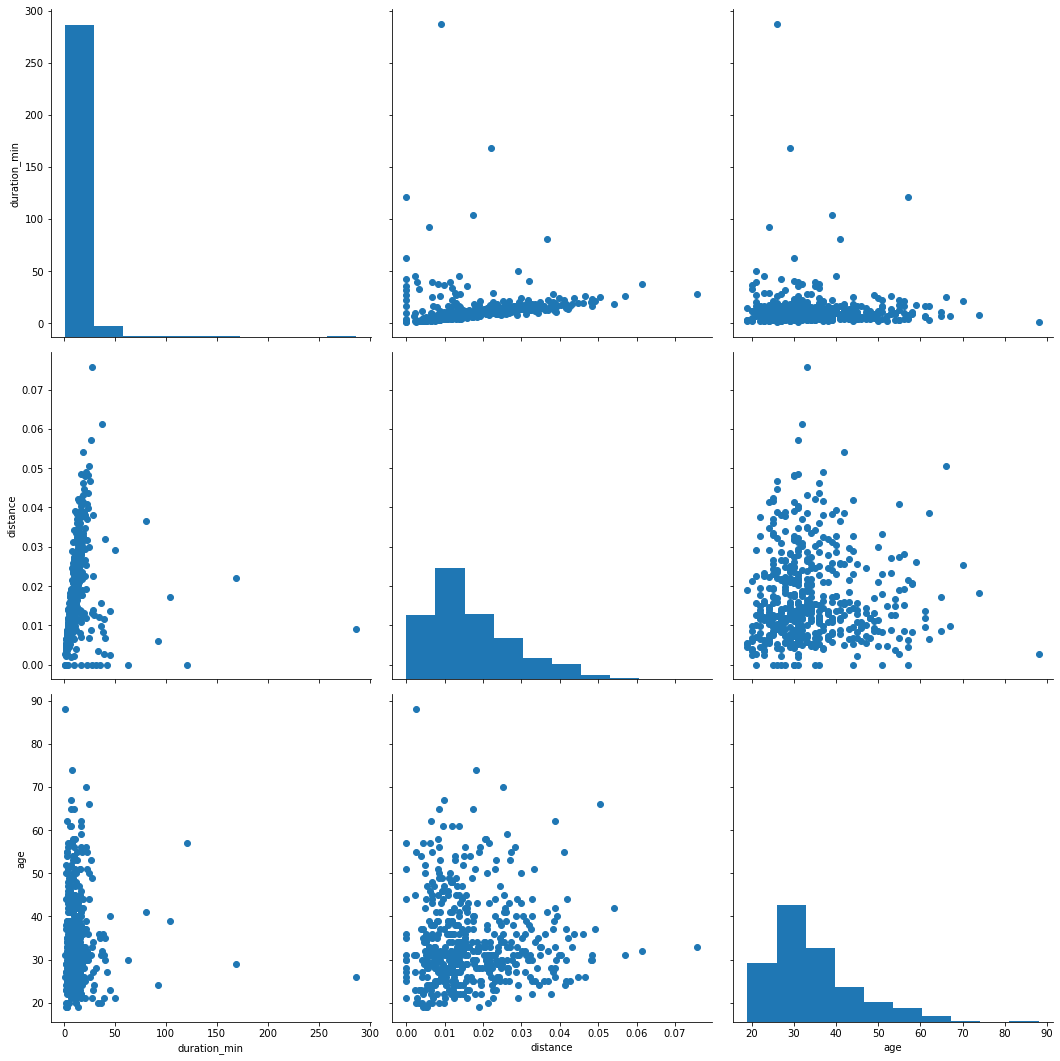

In [35]:
# plot matrix: sample 500 records so that plots are clearer and
# they render faster

samples = np.random.choice(gobike.shape[0], 500, replace = False)
gobike_samp = gobike.iloc[samples,:]

g = sb.PairGrid(data = gobike_samp, vars = numeric_vars, height =5)
g = g.map_diag(plt.hist, bins = 10)
g.map_offdiag(plt.scatter);

 >The correlation coefficient between distance and duration  is positive(0.141) as expected but not high.
 
 
 >The relation between distance and age is weak positive(0.009).
 
>The relation between duration and age is weak positive(0.006)
 
 
 Let's move on to looking at how price and carat weight correlate with the categorical variables

C:\Users\friends\anaconda3\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\friends\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\friends\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\friends\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From versio

<Figure size 720x720 with 0 Axes>

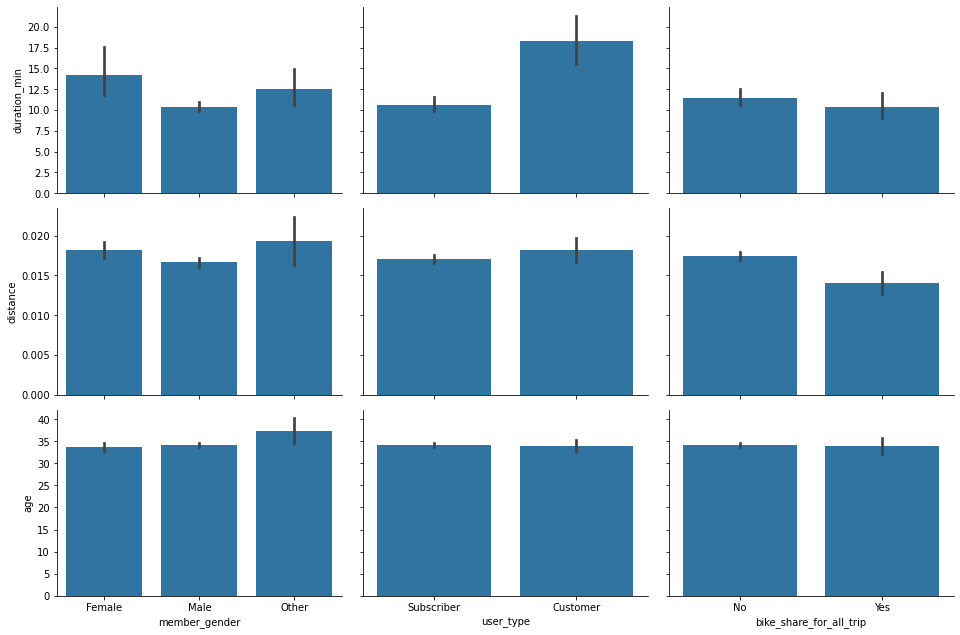

In [36]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(gobike.shape[0], 2000, replace = False)
gobike_samp = gobike.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.barplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = gobike_samp, y_vars = numeric_vars, x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

- Interestingly, it appears that subscriber cut distances in small time but customer take longer in his trip.we need to provide servieces to make trip easer and shorter for customer to be subscriber.
- There doesn't seem to be that much interaction between gender, user  and bike share.
- We can see that the bike share happen in small distances.


Next: ages VS distances

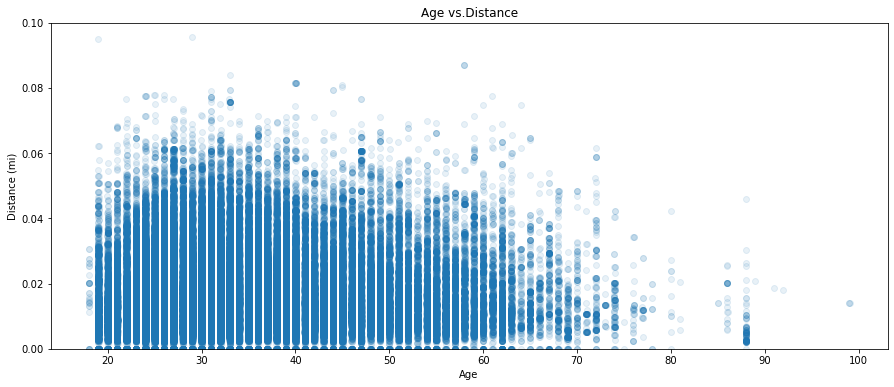

In [37]:
# scatter  plot for comparing age and distance. 
plt.figure(figsize = [15, 6])

sb.regplot(data = gobike ,x = 'age', y = 'distance', x_jitter=0.04, scatter_kws={'alpha':1/10},fit_reg = False)
plt.ylim(0,0.1)
plt.title('Age vs.Distance')
plt.xlabel('Age')
plt.ylabel('Distance (mi)');


 >It obviously,the long trip seem to be clustered around that  25:35's age range.


Finally, let's look at relationships between the three categorical features.


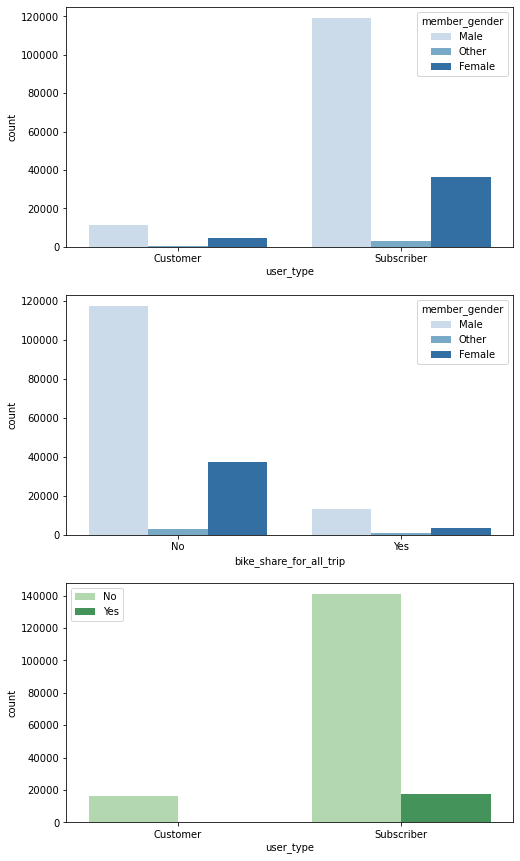

In [38]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 15])

# subplot 1: user type vs gender
plt.subplot(3, 1, 1)
sb.countplot(data = gobike, x = 'user_type', hue = 'member_gender', palette = 'Blues')

# subplot 2: bike share vs.gender
ax = plt.subplot(3, 1, 2)
sb.countplot(data = gobike, x = 'bike_share_for_all_trip', hue = 'member_gender', palette = 'Blues')

# subplot 3: user type vs. bike share, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = gobike, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Greens')
ax.legend(loc = 2) # re-arrange legend to remove overlapping

plt.show()

>The number of subscriber is much more than that of the customer we can see male subscribers are more than female subscribers, so we can make offers and make bikes in bright colors to attract all customers especially women to subscribe.
>Most of people don't share bike because small distances

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  duration had a surprisingly a very low  of correlation with the distance.The long trip seem to be clustered around that 25:35's age range. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The number of subscriber is much more than that of the customer.The male  for subscriber and Customer accounts are  very huge..

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the user type ,ages, and genders play role into the relationship between durations and distance.


Next:Trip duration across ages and genders

C:\Users\friends\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


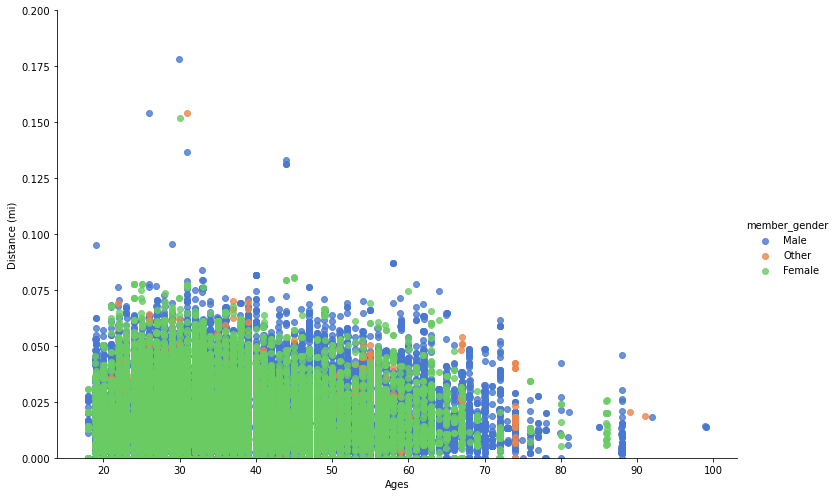

In [39]:
# scatter  plot for comparing trip Duration across ages and genders.
g = sb.FacetGrid(data = gobike, hue = 'member_gender', size = 7,aspect=1.5,ylim=[0,0.2],palette='muted')
                
g.map(sb.regplot, 'age', 'distance', x_jitter=0.04 ,fit_reg = False)
g.add_legend()
g.set_xlabels('Ages')
g.set_ylabels('Distance (mi)')

plt.show()


>It seem to be indication that male  rides longer than the other and female.
when it comes to older ages males use the bike more.

Trip time and distance across user type 

C:\Users\friends\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


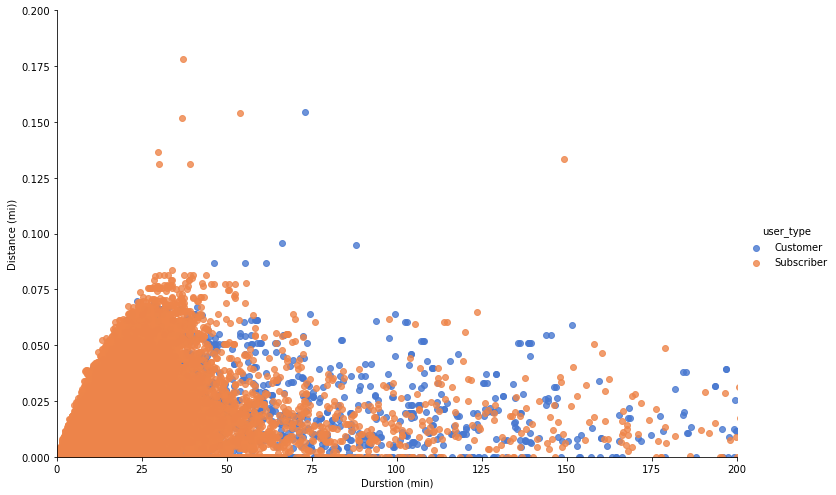

In [40]:
# scatter  plot for comparing trip time and distance across user type.
g = sb.FacetGrid(data = gobike, hue = 'user_type', size = 7,aspect=1.5,palette='muted',ylim=[0,0.2],xlim=[0,200])
                
g.map(sb.regplot, 'duration_min', 'distance', x_jitter=0.04 ,fit_reg = False)
g.add_legend()
g.set_xlabels('Durstion (min)')
g.set_ylabels('Distance (mi))')

plt.show()

>Subscribers and customers seem to have the same behavior when using  bikes for short-distance.

Trip time and distance across user type ,age, and geder

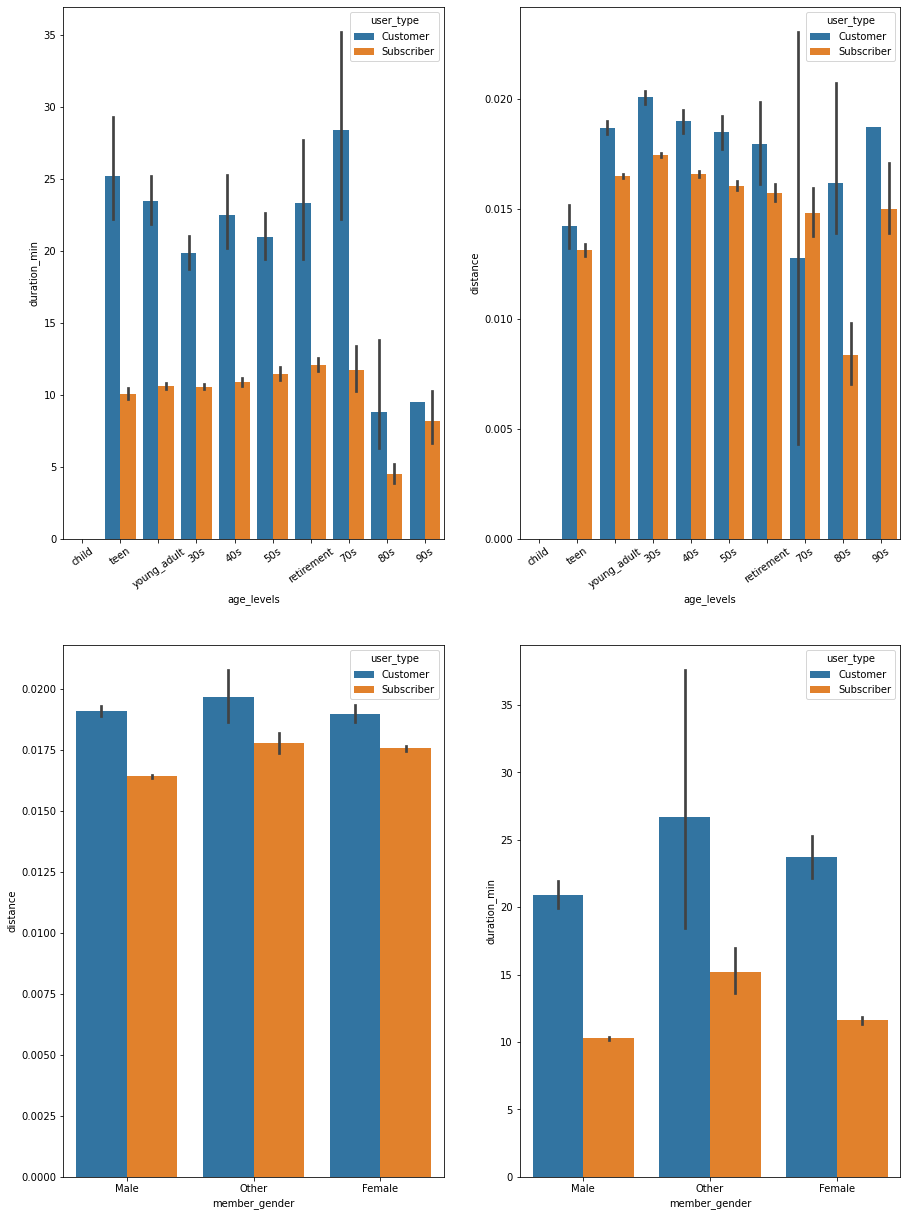

In [41]:
plt.figure(figsize=(15,45))

plt.subplot(4, 2, 1)
sb.barplot(data=gobike, x='age_levels', y='duration_min', hue='user_type')
plt.xticks(rotation=35)

plt.subplot(4, 2, 2)

sb.barplot(data=gobike, x='age_levels', y='distance', hue='user_type')
plt.xticks(rotation=35)

plt.subplot(4,2,3)
sb.barplot(data=gobike, x='member_gender', y='distance', hue='user_type')


plt.subplot(4,2,4)
sb.barplot(data=gobike, x='member_gender', y='duration_min', hue='user_type')


plt.show()

>  There are huge difference between subscribers and customers in durations in all ages, although the difference in distances is small.


> The customer has a higher average duration than the subsriber.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The distribution of distnace for all genders in different ages  is nearly the same.
The customer has a higher average duration than the subsriber.


### Were there any interesting or surprising interactions between features?
The customers  take a lot of time on short trips comparing to subscribers.
